In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Unzip the dataset file and store it in a folder called images.
# !unzip "/content/drive/MyDrive/RM_Segmentation_Assignment_dataset.zip" -d "/content/drive/MyDrive/images_segm/"

In [3]:
!pip install pycocotools

In [28]:
from pycocotools.coco import COCO
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
import skimage.io as io
import numpy as np


In [5]:
# Path to annotation file
train_ann_path = '/content/drive/MyDrive/images_segm/train-300/labels.json'
train_img_dir = '/content/drive/MyDrive/images_segm/train-300/data/'


In [6]:
# Initialising COCO API for instance annotations.
coco = COCO(train_ann_path)

loading annotations into memory...
Done (t=1.18s)
creating index...
index created!


In [7]:
# Extract and display COCO categories and supercategories for the training dataset.

category_IDs = coco.getCatIds()
categories = coco.loadCats(category_IDs)

print(categories)

[{'id': 0, 'name': 'airplane', 'supercategory': 'vehicle'}, {'id': 1, 'name': 'backpack', 'supercategory': 'accessory'}, {'id': 2, 'name': 'banana', 'supercategory': 'food'}, {'id': 3, 'name': 'baseball bat', 'supercategory': 'sports'}, {'id': 4, 'name': 'baseball glove', 'supercategory': 'sports'}, {'id': 5, 'name': 'bear', 'supercategory': 'animal'}, {'id': 6, 'name': 'bench', 'supercategory': 'outdoor'}, {'id': 7, 'name': 'bicycle', 'supercategory': 'vehicle'}, {'id': 8, 'name': 'bird', 'supercategory': 'animal'}, {'id': 9, 'name': 'boat', 'supercategory': 'vehicle'}, {'id': 10, 'name': 'book', 'supercategory': 'indoor'}, {'id': 11, 'name': 'bottle', 'supercategory': 'kitchen'}, {'id': 12, 'name': 'bowl', 'supercategory': 'kitchen'}, {'id': 13, 'name': 'broccoli', 'supercategory': 'food'}, {'id': 14, 'name': 'bus', 'supercategory': 'vehicle'}, {'id': 15, 'name': 'cake', 'supercategory': 'food'}, {'id': 16, 'name': 'car', 'supercategory': 'vehicle'}, {'id': 17, 'name': 'carrot', 'sup

In [8]:
names_catg = [catg["name"] for catg in categories]
print(len(names_catg), "COCO categories:", ", ".join(names_catg))


63 COCO categories: airplane, backpack, banana, baseball bat, baseball glove, bear, bench, bicycle, bird, boat, book, bottle, bowl, broccoli, bus, cake, car, carrot, cat, cell phone, chair, clock, cow, cup, dining table, dog, donut, elephant, fire hydrant, fork, frisbee, giraffe, handbag, horse, hot dog, kite, knife, laptop, motorcycle, oven, parking meter, person, pizza, potted plant, refrigerator, remote, sandwich, scissors, skateboard, skis, spoon, sports ball, stop sign, suitcase, surfboard, tennis racket, tie, traffic light, train, truck, umbrella, vase, wine glass


In [9]:
names_scatg = set([catg["supercategory"] for catg in categories])
print(len(names_scatg), "COCO supercategories:", ", ".join(names_scatg))

12 COCO supercategories: food, person, kitchen, appliance, vehicle, sports, electronic, accessory, outdoor, furniture, indoor, animal


In [10]:
for i in range(len(categories)):
  if categories[i]['name']=='dog':
    print(categories[i]['id'])


25


In [11]:
#catg name from ID
def get_catg_name(catg_id,categories):
  for i in range(len(categories)):
    if catg_id==categories[i]['id']:
      return categories[i]['name']
  return 'None'

In [12]:
get_catg_name(54,categories)

'surfboard'

In [13]:
filter_catg=['dog']
category_IDs = coco.getCatIds(catNms=filter_catg)
image_IDs = coco.getImgIds(catIds=category_IDs)

print(f"Number of images containing specified category(ies): {len(image_IDs)}.")
print(f"IDs of images containing specified category(ies): {image_IDs}.")


Number of images containing specified category(ies): 10.
IDs of images containing specified category(ies): [32, 225, 261, 71, 169, 111, 21, 215, 121, 159].


{'id': 32, 'file_name': '000000002754.jpg', 'height': 480, 'width': 640, 'license': None, 'coco_url': None}


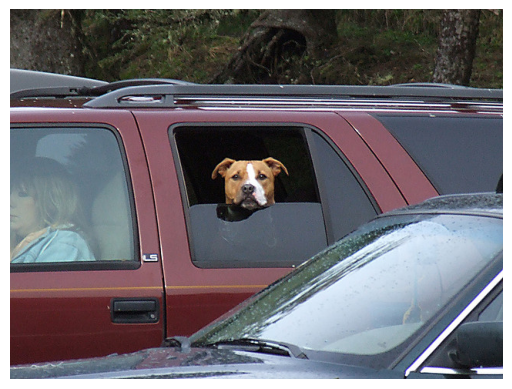

In [14]:
example_image = coco.loadImgs(image_IDs[0])[0]
print(example_image)

image = io.imread(f'{train_img_dir}/{example_image["file_name"]}')
plt.axis("off")
plt.imshow(image)

plt.show()

In [15]:
# Get COCO annotation IDs and content of annotations, i.e., bounding boxes and segmentation masks.

test_image_annotations_ID = coco.getAnnIds(
    imgIds=example_image["id"], catIds=category_IDs, iscrowd=None
)
print(test_image_annotations_ID)

test_image_annotations = coco.loadAnns(test_image_annotations_ID)
print(test_image_annotations)

[353]
[{'id': 353, 'image_id': 32, 'category_id': 25, 'bbox': [252.09, 190.35, 109.71000000000001, 137.54], 'segmentation': [[350.0, 326.5, 251.5, 325.0, 263.5, 289.0, 278.5, 259.0, 281.0, 256.5, 300.5, 258.0, 279.0, 254.5, 277.5, 221.0, 272.0, 215.5, 269.0, 221.5, 261.5, 220.0, 263.5, 207.0, 274.0, 194.5, 286.0, 192.5, 300.0, 195.5, 339.0, 189.5, 357.5, 205.0, 360.0, 214.5, 351.0, 207.5, 348.5, 213.0, 342.5, 216.0, 343.5, 250.0, 330.5, 257.0, 337.0, 255.5, 339.5, 259.0, 341.5, 285.0, 350.0, 326.5], [305.5, 259.0, 301.5, 259.0, 305.5, 259.0]], 'area': 15089.5134, 'iscrowd': 0, 'supercategory': 'animal'}]


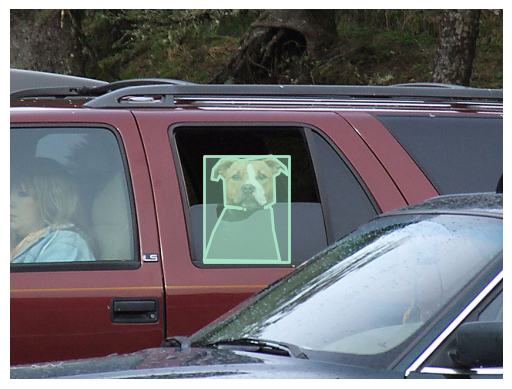

In [18]:
# Load and display test image with instance annotations.

plt.imshow(image)
plt.axis("off")

coco.showAnns(test_image_annotations, draw_bbox=True)

In [19]:
# Extract the training images that contain any combination of the four target classes.

target_classes = ["cake", "cat", "dog", "person"]
target_classes_IDs = coco.getCatIds(catNms=target_classes)
training_images = []

# Iterate over each individual class in the list.
for class_name in target_classes:
    # Get all images containing target class.
    print(class_name)
    training_images_categories = coco.getCatIds(catNms=class_name)
    training_images_IDs = coco.getImgIds(catIds=training_images_categories)
    training_images += coco.loadImgs(training_images_IDs)

print(
    f"Number of images with target classes including repetitions: {len(training_images)}."
)

cake
cat
dog
person
Number of images with target classes including repetitions: 287.


In [20]:
# Filter out repeated images.
unique_training_images = []

for i in range(len(training_images)):
    if training_images[i] not in unique_training_images:
        unique_training_images.append(training_images[i])

# Shuffle the training data.
random.seed(0)
random.shuffle(unique_training_images)

print(
    f"Number of unique images in training data containing the target classes: {len(unique_training_images)}"
)

Number of unique images in training data containing the target classes: 276


{'id': 244, 'file_name': '000000016403.jpg', 'height': 640, 'width': 480, 'license': None, 'coco_url': None}


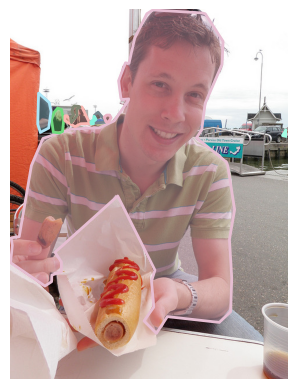

In [32]:
# Load and display example training image with segmentation masks.

training_image = unique_training_images[10]
print(training_image)

image = io.imread(f'{train_img_dir}/{training_image["file_name"]}')
plt.axis("off")
plt.imshow(image)

training_image_annotations_ID = coco.getAnnIds(
    imgIds=training_image["id"], catIds=target_classes_IDs, iscrowd=None
)
training_image_annotations = coco.loadAnns(training_image_annotations_ID)
coco.showAnns(training_image_annotations, draw_bbox=False)

plt.show()

In [33]:
# To generate segmentation mask use annToMask function and extract the info stored in the annotations.
# For example, for the first object in our example training image:

mask_example = coco.annToMask(training_image_annotations[0])

print(type(mask_example))
print(mask_example)
print(mask_example.shape)
print(np.max(mask_example))
print(np.min(mask_example))

<class 'numpy.ndarray'>
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(640, 480)
1
0


Unique pixel values in the mask: [0. 3.]


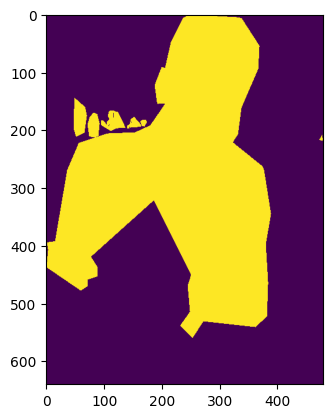

In [34]:
# Plotting the segmentation masks with different colours.
# There are many ways to do this. This is just one example.

mask = np.zeros((training_image["height"], training_image["width"]))

for i in range(len(training_image_annotations)):
    # Get object category name.
    object_category = get_catg_name(
        training_image_annotations[i]["category_id"], categories
    )
    # Assign pixel value based on location in target_classes list.
    pixel_value = target_classes.index(object_category) + 1
    # Assign pixel value to mask based on annToMask output.
    mask = np.maximum(coco.annToMask(training_image_annotations[i]) * 3, mask)

print(f"Unique pixel values in the mask: {np.unique(mask)}")

plt.imshow(mask)
plt.show()